# Setup of dataset:

In [67]:
import torch
import pandas as pd
import sqlite3

In [71]:
pd.read_pickle('datasets/event_nos_500k_muon_set1.pkl')

,event_no
904733,139803918
1062456,140000689
1168020,140132524
1385844,140404865
1207146,140181448
...,...
414725,139192155
1274062,140265054
571318,139387554
135071,138843228


In [75]:
db_path = "C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/raw_data/rasmus_classification_muon_3neutrino_3mio.db"
with sqlite3.connect(str(db_path)) as con:
    query = "SELECT charge_log10, time, dom_x, dom_y, dom_z, SRTInIcePulses FROM features WHERE event_no = 139803918"

    tmp_event = pd.read_sql(query,con)
tmp_event

,charge_log10,time,dom_x,dom_y,dom_z,SRTInIcePulses
0,0.000000,-0.719155,-1.206695,-2.036696,-0.156929,0
1,-0.181238,-0.278992,-0.483910,-0.081476,1.294190,0
2,-1.430236,-0.164135,-0.981397,-0.164000,0.651248,1
3,-0.385923,-0.259355,-0.981397,-0.164000,0.685478,1
4,-2.637545,-0.165617,-1.483302,-0.245266,-0.114454,0
...,...,...,...,...,...,...
70,0.083393,-0.015191,-0.343965,-0.974531,0.022444,1
71,0.162615,-0.003705,-0.343965,-0.974531,0.056674,1
72,-3.170552,-0.016673,-0.343965,-0.974531,0.056674,1
73,-0.499121,-0.019266,-0.343965,-0.974531,0.090924,1


In [94]:
x_pos = torch.tensor(tfs['features']['dom_x'].inverse_transform(tmp_event[['dom_x']]),dtype=torch.float)
y_pos = torch.tensor(tfs['features']['dom_y'].inverse_transform(tmp_event[['dom_y']]),dtype=torch.float)
z_pos = torch.tensor(tfs['features']['dom_z'].inverse_transform(tmp_event[['dom_z']]),dtype=torch.float)
x = torch.cat([torch.tensor(tmp_event[['charge_log10','time']].values,dtype=torch.float),x_pos,y_pos,z_pos],dim=1)
pos = torch.cat([x_pos,y_pos,z_pos],dim=1)
unscaled_pos = torch.tensor(tmp_event[['dom_x','dom_y','dom_z']].values,dtype=torch.float)
x

tensor([[ 0.0000e+00, -7.1916e-01, -2.5614e+02, -5.2108e+02, -2.8692e+02],
        [-1.8124e-01, -2.7899e-01, -7.7800e+01, -5.4330e+01,  4.3462e+02],
        [-1.4302e+00, -1.6413e-01, -2.0055e+02, -7.4030e+01,  1.1493e+02],
        [-3.8592e-01, -2.5936e-01, -2.0055e+02, -7.4030e+01,  1.3195e+02],
        [-2.6375e+00, -1.6562e-01, -3.2439e+02, -9.3430e+01, -2.6580e+02],
        [ 0.0000e+00, -1.7340e+00, -4.4774e+02, -1.1313e+02, -3.6738e+02],
        [ 7.3917e-01, -7.8918e-02,  3.7156e+02, -9.2180e+01,  2.5000e+01],
        [-3.8592e-01,  1.7043e-01,  2.4815e+02, -1.1187e+02,  2.2570e+02],
        [-1.6569e+00,  6.9285e-02,  1.2497e+02, -1.3125e+02,  8.5160e+01],
        [ 2.3806e-01,  5.5206e-02,  1.2497e+02, -1.3125e+02,  8.5160e+01],
        [-1.8124e-01, -1.4609e+00,  1.7100e+00, -1.5063e+02,  4.1215e+02],
        [ 0.0000e+00, -9.0330e-01, -1.2177e+02, -1.7103e+02, -1.1047e+02],
        [ 1.6261e-01, -8.3735e-02, -1.2177e+02, -1.7103e+02, -4.2390e+01],
        [ 3.7896e-01, -2.

In [98]:
import torch_geometric.transforms as T
from torch_geometric.data import InMemoryDataset, Data
dat = Data(x=x,edge_index=None,edge_attr=None,y=None,pos=pos)
print(T.KNNGraph(loop=True,force_undirected=False)(dat).edge_index[0].view(-1,6))
dat = Data(x=x,edge_index=None,edge_attr=None,y=None,pos=unscaled_pos)
T.KNNGraph(loop=True,force_undirected=False)(dat).edge_index[0].view(-1,6)

tensor([[ 0, 53, 51, 52, 44, 45],
        [ 1, 10, 31, 19, 34, 33],
        [ 2,  3, 59, 38, 55, 37],
        [ 3,  2, 59, 38, 55, 37],
        [ 4, 58,  5, 35, 32, 41],
        [ 5,  4, 35, 58, 32, 41],
        [ 6, 64,  7,  9,  8, 60],
        [ 7, 64,  9,  8, 61, 62],
        [ 9,  8, 64,  7, 40, 30],
        [ 9,  8, 64,  7, 40, 30],
        [10,  1, 31, 19, 34, 33],
        [11, 12, 13, 15, 14, 54],
        [12, 13, 15, 14, 11, 55],
        [13, 15, 14, 12, 55, 37],
        [15, 14, 55, 37, 17, 13],
        [15, 14, 55, 37, 17, 13],
        [18, 16, 28,  7, 61, 62],
        [55, 37, 17, 15, 14, 13],
        [18, 16, 28,  7, 61, 62],
        [19,  1, 31, 34, 33, 10],
        [21, 20, 65, 36, 74, 67],
        [21, 20, 65, 36, 74, 67],
        [24, 23, 22, 25, 29, 30],
        [24, 23, 22, 25, 29, 30],
        [24, 23, 22, 25, 29, 30],
        [25, 24, 23, 22, 30, 29],
        [26, 35, 32,  4,  2,  3],
        [27,  6, 28, 29, 18, 16],
        [28, 18, 16, 27, 61, 62],
        [29, 3

tensor([[ 0, 53, 51, 52, 46, 44],
        [ 1, 10, 19, 31, 34, 33],
        [ 2,  3, 59, 38, 17, 55],
        [ 3,  2, 59, 38, 17, 55],
        [ 4, 58,  5, 35, 32, 59],
        [ 5,  4, 35, 58, 59, 32],
        [ 6,  7, 60, 18, 16, 64],
        [ 7, 64,  8,  9, 61, 62],
        [ 8,  9, 64,  7, 63, 10],
        [ 8,  9, 64,  7, 63, 10],
        [10,  1,  8,  9, 38, 31],
        [11, 12, 13, 15, 14, 17],
        [12, 13, 15, 14, 11, 17],
        [13, 15, 14, 12, 17, 55],
        [15, 14, 17, 55, 37, 13],
        [15, 14, 17, 55, 37, 13],
        [18, 16,  6,  7, 28, 61],
        [17, 55, 37, 15, 14, 13],
        [18, 16,  6,  7, 28, 61],
        [19, 34, 33,  1, 31,  3],
        [21, 20, 36, 74, 65, 67],
        [21, 20, 36, 74, 65, 67],
        [24, 23, 22, 25, 29, 30],
        [24, 23, 22, 25, 29, 30],
        [24, 23, 22, 25, 29, 30],
        [25, 24, 23, 22, 29, 30],
        [26, 35, 32,  4, 33, 34],
        [27, 28, 18, 16,  6, 29],
        [28, 27, 18, 16,  6, 29],
        [29, 3

In [91]:
edge_ind[0,:slices['edge_index'][1]]

tensor([ 0,  1,  8, 15,  7,  6,  1,  0,  8, 15,  7,  6,  2,  3,  5,  4, 15,  7,
         3,  5,  4, 15,  7,  6,  5,  4, 15,  7,  6,  3,  5,  4, 15,  7,  6,  3,
        15,  7,  6,  5,  4,  3, 15,  7,  6,  5,  4,  3,  8, 15,  7,  6,  5,  4,
         9, 25, 14, 16, 24, 23, 10, 24, 23, 17, 22,  9, 11, 12, 13, 19, 18, 21,
        12, 13, 11, 19, 18, 21, 13, 12, 11, 19, 18, 21,  9, 25, 14, 16, 24, 23,
        15,  7,  6,  5,  4,  3,  9, 25, 14, 16, 24, 23, 24, 23, 17, 22,  9, 25,
        19, 18, 21, 20, 22, 24, 19, 18, 21, 20, 22, 24, 21, 20, 22, 24, 23, 19,
        21, 20, 22, 24, 23, 19, 22, 24, 23, 17, 21, 20, 24, 23, 17, 22,  9, 25,
        24, 23, 17, 22,  9, 25,  9, 25, 14, 16, 24, 23])

In [93]:
data.x

tensor([[-1.4302, -0.1641, -0.9814, -0.1640,  0.6512],
        [-0.3859, -0.2594, -0.9814, -0.1640,  0.6855],
        [ 0.1626, -0.0837, -0.6621, -0.5703,  0.3349],
        ...,
        [ 0.3790, -0.1100, -0.8430, -1.0594,  0.4967],
        [-1.0558, -0.1130, -0.8430, -1.0594,  0.4625],
        [-1.0558, -0.2634, -0.8430, -1.0594,  0.4283]])

In [2]:
data, slices = torch.load('datasets/muon_100k_set11_SRT.pt')
data

Data(edge_index=[2, 18388033], pos=[3065645, 3], x=[3065645, 5], y=[100000, 10])

In [5]:
edge_ind = data.edge_index.clone()
for i in range(100000):
    edge_ind[:,slices['edge_index'][i]:slices['edge_index'][i+1]] += slices['x'][i]

In [66]:
# i = 4
# edge_ind[0,edge_ind[1] == i]
# data.x[edge_ind[0,edge_ind[1]==0],:],data.x[0,:]
# data.x[:6]
# edge_ind[0,:slices['edge_index'][2]].view(-1,6)
# data.x[[ 9, 25, 14, 16, 24, 23]]
tfs = pd.read_pickle('datasets/transformers.pkl')
print(tfs['features']['dom_x'].scale_,tfs['features']['dom_y'].scale_,tfs['features']['dom_z'].scale_)
print(tfs['features']['dom_x'].center_,tfs['features']['dom_y'].center_,tfs['features']['dom_z'].center_)
print('different scales affect the graph creation procedure!')

[246.73999786] [238.71999359] [497.23001099]
[41.59999847] [-34.88000107] [-208.88999939]
different scales affect the graph creation procedure!


In [55]:
event = data.x[:slices['x'][1]].clone()
event[torch.argsort(event[:,1])]


tensor([[-1.9216, -0.3146, -0.6621, -0.5703,  0.5745],
        [ 0.0834, -0.2983, -0.6621, -0.5703,  0.4375],
        [ 0.5084, -0.2942, -0.6621, -0.5703,  0.4718],
        [ 0.3790, -0.2827, -0.6621, -0.5703,  0.4375],
        [-0.3859, -0.2594, -0.9814, -0.1640,  0.6855],
        [ 0.0000, -0.2312, -0.6621, -0.5703,  0.4718],
        [ 0.3790, -0.2205, -0.6621, -0.5703,  0.4033],
        [-1.4302, -0.1641, -0.9814, -0.1640,  0.6512],
        [ 0.6845, -0.1534, -0.6621, -0.5703,  0.4718],
        [ 0.1626, -0.0837, -0.6621, -0.5703,  0.3349],
        [-2.2394, -0.0300, -0.3440, -0.9745,  0.0909],
        [ 0.0000, -0.0270, -0.3440, -0.9745,  0.0567],
        [-1.6569, -0.0267, -0.3440, -0.9745,  0.0909],
        [-0.3859, -0.0241, -0.3440, -0.9745,  0.0909],
        [-0.4991, -0.0193, -0.3440, -0.9745,  0.0909],
        [-3.1706, -0.0167, -0.3440, -0.9745,  0.0567],
        [ 0.0834, -0.0152, -0.3440, -0.9745,  0.0224],
        [ 0.1626, -0.0037, -0.3440, -0.9745,  0.0567],
        [ 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch_geometric.transforms as T
from torch_geometric.data import Data
import torch

Investigate how to deal with periodic target variable

In [2]:
help(np.random.multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...) method of numpy.random.mtrand.RandomState instance
    multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    .. note::
        New code should use the ``multivariate_normal`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)

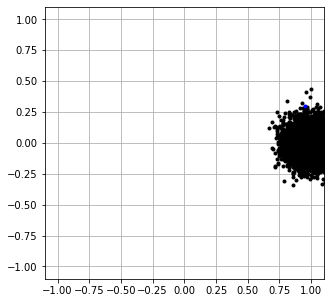

In [22]:
y = 0.3
x = 0
sx = 0.01
eps = 1e-5
sin = np.sin(x)
cos = np.cos(x)
cov = np.zeros((2,2))
cov[0,0] = sx#np.abs(sin*sx) + sx
cov[1,1] = sx#np.abs(cos*sx) + sx

N = 5000

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
ax.set(xlim=(-1.1,1.1),ylim=(-1.1,1.1))
ax.plot(np.cos(y),np.sin(y),'b.',zorder=10)
# ax.plot(np.random.normal(cos,np.abs(sin*x),N),np.random.normal(sin,np.abs(cos*x),N),'r.',alpha=0.5)
points = np.random.multivariate_normal(np.append(cos,sin),cov,N)
plt.plot(points[:,0],points[:,1],'k.')
# np.random.multivariate_normal(np.append(cos,sin),cov,N).shape

Quick check whether the data includes upgrade. which it does not if pmt desribes the upgrade.

In [11]:
import sqlite3

filename = "rasmus_classification_muon_3neutrino_3mio.db"
db_path = "C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/raw_data/{}".format(filename)

event_nos = pd.read_pickle("datasets/event_nos_500k_muon_set1.pkl")

for event in event_nos.values[:,0]:
    query = "SELECT pmt, pmt_x, pmt_y, pmt_z FROM features WHERE event_no = {}".format(event)

    with sqlite3.connect(str(db_path)) as con:
        df = pd.read_sql(query,con)
    print(df.pmt.unique())

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


KeyboardInterrupt: 

In [9]:
event_nos.values[:,0]

array([139803918, 140000689, 140132524, ..., 139387554, 138843228,
       140187370], dtype=int64)

In [13]:
fig, ax = plt.subplots()
# ax.scatter(df.dom_x)

,row,event_no,string,dom,pmt,dom_x,dom_y,dom_z,pmt_x,pmt_y,pmt_z,pmt_area,pmt_type,time,charge_log10,lc,pulse_width,SplitInIcePulses,SRTInIcePulses
0,153746963,139803918,1,47,0,-1.206695,-2.036696,-0.156929,0.0,0.0,-1.0,0.0444,20,-0.719155,0.000000,0,8,1,0
1,153746964,139803918,35,5,0,-0.483910,-0.081476,1.294190,0.0,0.0,-1.0,0.0444,20,-0.278992,-0.181238,0,8,1,0
2,153746965,139803918,34,25,0,-0.981397,-0.164000,0.651248,0.0,0.0,-1.0,0.0444,20,-0.164135,-1.430236,1,1,1,1
3,153746966,139803918,34,24,0,-0.981397,-0.164000,0.685478,0.0,0.0,-1.0,0.0444,20,-0.259355,-0.385923,1,1,1,1
4,153746967,139803918,33,46,0,-1.483302,-0.245266,-0.114454,0.0,0.0,-1.0,0.0444,20,-0.165617,-2.637545,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,153747033,139803918,17,42,0,-0.343965,-0.974531,0.022444,0.0,0.0,-1.0,0.0444,20,-0.015191,0.083393,1,1,1,1
71,153747034,139803918,17,41,0,-0.343965,-0.974531,0.056674,0.0,0.0,-1.0,0.0444,20,-0.003705,0.162615,1,1,1,1
72,153747035,139803918,17,41,0,-0.343965,-0.974531,0.056674,0.0,0.0,-1.0,0.0444,20,-0.016673,-3.170552,1,1,1,1
73,153747036,139803918,17,40,0,-0.343965,-0.974531,0.090924,0.0,0.0,-1.0,0.0444,20,-0.019266,-0.499121,1,1,1,1


Nedenstående er noget multinomial halløj

In [74]:
x = torch.tensor(np.pi/4)
R = torch.tensor([[torch.cos(x),torch.sin(x)],[-torch.sin(x),torch.cos(x)]])

pos = torch.tensor(np.mgrid[-5:5:0.1,-5:5:0.1]).view(2,-1).T

mean = torch.tensor([0,0],dtype=torch.float)
cov = R.T@torch.tensor([[5,0],[0,0.5]],dtype=torch.float)@R

P = torch.exp(-0.5*torch.matmul((pos-mean).unsqueeze(1), torch.matmul(torch.inverse(cov).double(), (pos-mean).unsqueeze(2)))).squeeze()/\
torch.sqrt(torch.det(cov))
# plt.scatter(pos.view(2,-1)[0],pos.view(2,-1)[1],s=0.1)

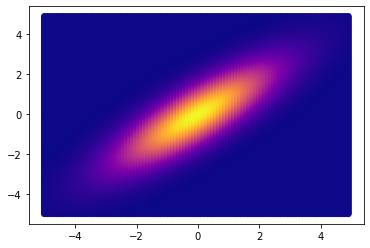

In [75]:
fig, ax = plt.subplots()
ax.scatter(pos[:,0],pos[:,1],c=P,cmap='plasma')

In [73]:
tmp = torch.zeros((2,2,2))
R = torch.zeros((2,2,2))
tmp[:,[0,1],[0,1]] = torch.square(torch.tensor([[1,2],[2,3]],dtype=torch.float))

cos = torch.cos(torch.tensor([0.2,0.5]))
sin = torch.sin(torch.tensor([0.2,0.5]))
# R[:,[0,0,1,1],[0,1,0,1]] = torch.cat([cos.view(-1,2), sin.view(2,-1), -sin.view(2,-1), cos.view(2,-1)],axis=1)

R[:,0,0] = cos
R[:,0,1] = sin
R[:,1,0] = -sin
R[:,1,1] = cos

# torch.matmul(R,torch.matmul(tmp,torch.transpose(R,1,2))).shape
R

tensor([[[ 0.9801,  0.1987],
         [-0.1987,  0.9801]],

        [[ 0.8776,  0.4794],
         [-0.4794,  0.8776]]])

In [43]:
torch.cat([cos.view(2,-1), sin.view(2,-1), -sin.view(2,-1), cos.view(2,-1)],axis=1)

tensor([[ 0.9801,  0.1987, -0.1987,  0.9801],
        [ 0.8776,  0.4794, -0.4794,  0.8776]])

In [2]:
seq = pd.read_csv('data/sequential_background.csv')
seq

,Unnamed: 0,row,event_no,pulse_no,dom_string,dom_pmt,dom_x,dom_y,dom_z,dom_time,dom_charge,SplitInIcePulses,SRTInIcePulses
0,0,1,1,0,34,44,-200.550003,-74.029999,-208.470001,5993,0.975,1,0
1,1,2,1,1,19,45,210.470001,-209.770004,-251.970001,6455,0.675,1,0
2,2,3,1,2,49,10,472.049988,127.900002,351.089996,6493,1.025,1,0
3,3,4,1,3,86,16,-10.970000,6.720000,-192.039993,6554,0.925,1,0
4,4,5,1,4,71,22,-21.969999,393.239990,142.380005,7368,0.775,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8889141,8889141,8889142,128730,61,44,4,-156.229996,43.369999,449.769989,15917,0.675,1,0
8889142,8889142,8889143,128730,62,55,34,11.870000,179.190002,-59.340000,16268,0.975,1,0
8889143,8889143,8889144,128730,63,75,9,-347.880005,451.519989,365.839996,16351,0.575,1,0
8889144,8889144,8889145,128730,64,79,53,31.250000,-72.930000,-453.489990,16606,0.775,1,0


In [3]:
sca = pd.read_csv('data/scalar_background.csv')

In [4]:
sca

,Unnamed: 0,event_no,true_primary_energy,true_primary_time,true_primary_position_x,true_primary_position_y,true_primary_position_z,true_primary_direction_x,true_primary_direction_y,true_primary_direction_z
0,0,1,2.422178,8127.648855,17.395869,799.810842,-190.892722,-0.449283,-0.652320,-0.610429
1,1,2,2.311812,8613.648743,753.894477,-267.662321,-255.052898,-0.865731,0.296605,-0.403157
2,2,3,3.433424,8719.072224,-778.158990,185.657174,-176.742064,0.880773,-0.310683,-0.357373
3,3,4,2.582473,7874.277010,174.832033,-92.164410,800.000000,-0.100173,0.485243,-0.868622
4,4,5,2.783172,6501.622581,-60.428231,-797.714503,388.631793,-0.297639,0.579176,-0.758924
...,...,...,...,...,...,...,...,...,...,...
128725,128725,128726,2.763289,8291.685792,42.544332,-798.867936,-142.154063,-0.393241,0.637695,-0.662350
128726,128726,128727,2.319792,8522.035476,741.080690,301.329407,353.539529,-0.405998,-0.305501,-0.861298
128727,128727,128728,2.258075,8153.767391,-774.394920,-200.779749,-278.106336,0.638595,0.573444,-0.513184
128728,128728,128729,2.697005,7477.165860,599.886151,235.419541,800.000000,-0.485086,-0.483525,-0.728626


In [2]:
test, slices = torch.load('train_test_datasets/test_type')

In [7]:
sum(test.y == 0), sum(test.y == 1), sum(test.y == 2)

(tensor(33304), tensor(33416), tensor(33280))

In [5]:
seq = pd.read_csv('data/sequential.csv')
scalar = pd.read_csv('data/scalar.csv')

In [6]:
seq

,Unnamed: 0,index,event_no,pulse_no,dom_x,dom_y,dom_z,dom_charge,dom_time,SplitInIcePulses,SRTInIcePulses
0,0,0,9219761,0,248.149994,-111.870003,-472.149994,0.175,5727,1,0
1,1,1,9219761,1,361.000000,-422.829987,414.410004,0.575,5840,1,0
2,2,2,9219761,2,41.599998,35.490002,-234.990005,1.475,6478,1,0
3,3,3,9219761,3,41.599998,35.490002,-234.990005,0.525,6509,1,0
4,4,4,9219761,4,-10.970000,6.720000,140.360001,0.375,6911,1,0
...,...,...,...,...,...,...,...,...,...,...,...
17276331,5921823,5921823,9108753,98,429.760010,351.019989,-140.639999,1.425,14333,1,0
17276332,5921824,5921824,9108753,99,326.850006,-209.070007,-80.279999,0.975,14370,1,0
17276333,5921825,5921825,9108753,100,576.369995,170.919998,-271.890015,0.825,14631,1,0
17276334,5921826,5921826,9108753,101,35.540001,-364.829987,-98.010002,1.875,15295,1,0


In [7]:
scalar

,Unnamed: 0,index,event_no,true_primary_energy,true_primary_time,true_primary_position_x,true_primary_position_y,true_primary_position_z,true_primary_direction_x,true_primary_direction_y,true_primary_direction_z
0,0,0,9046728,1.039659,9724.702595,84.007514,54.627137,-224.842781,-0.975643,-0.179339,0.126330
1,1,1,9046743,2.127483,9603.571564,-42.488789,-183.541941,-485.287729,0.742328,0.635390,-0.212672
2,2,2,9046747,1.205234,9790.872049,16.707779,-79.376813,-398.508239,0.215108,-0.567491,-0.794785
3,3,3,9046748,0.820345,9878.454570,114.190375,-64.239228,-310.199591,-0.697702,-0.483983,0.528179
4,4,4,9046752,1.298331,9842.994170,31.476315,34.067668,-423.010471,0.924405,0.187927,-0.331902
...,...,...,...,...,...,...,...,...,...,...,...
299995,99995,99995,9606544,1.583165,9777.440749,47.667670,56.850796,-399.492791,-0.667318,-0.743405,-0.045111
299996,99996,99996,9606548,1.976087,9787.132496,101.820125,-44.377728,-310.844133,-0.006114,-0.365813,-0.930668
299997,99997,99997,9606549,1.553793,9758.908053,-5.800471,-58.836014,-459.444765,0.335563,0.808588,-0.483304
299998,99998,99998,9606553,1.701843,9556.154174,18.561243,81.744062,-240.674685,0.533221,-0.178778,-0.826870


In [8]:
i = 0
for event in seq['event_no'].unique():
    i += 1
    tmp = seq.loc[seq['event_no'] == event]


    if i >= 1:
        break

In [13]:
tmp.duplicated(subset=['dom_x','dom_y','dom_z']),tmp[['dom_x','dom_y','dom_z']]

(0     False
 1     False
 2     False
 3      True
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19     True
 20    False
 21     True
 22    False
 23    False
 24    False
 25    False
 26    False
 27     True
 dtype: bool,
          dom_x       dom_y       dom_z
 0   248.149994 -111.870003 -472.149994
 1   361.000000 -422.829987  414.410004
 2    41.599998   35.490002 -234.990005
 3    41.599998   35.490002 -234.990005
 4   -10.970000    6.720000  140.360001
 5  -324.390015  -93.430000  159.720001
 6   248.149994 -111.870003  463.989990
 7  -313.600006  237.440002  467.149994
 8   -10.970000    6.720000 -402.299988
 9   -10.970000    6.720000 -388.279999
 10  -10.970000    6.720000 -381.269989
 11  -10.970000    6.720000 -409.309998
 12  -10.970000    6.720000 -395.290009
 13  -10.970000    6.720000 -353.239990
 14 -334.799988 -424.5

In [23]:
dat,slices = torch.load('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/train_test_datasets/t30k_e30k_m30k')

In [42]:
dat.x.shape

torch.Size([5169174, 5])

In [54]:
for j in range(100):
    print(j)
    print('positions:   ',pd.DataFrame(dat.pos[slices['x'][j]:slices['x'][j+1]]).duplicated().any())
    print('features:    ',pd.DataFrame(dat.x[slices['x'][j]:slices['x'][j+1],2:]).duplicated().any())

0
positions:    False
features:     False
1
positions:    False
features:     False
2
positions:    False
features:     False
3
positions:    False
features:     False
4
positions:    False
features:     False
5
positions:    False
features:     False
6
positions:    False
features:     False
7
positions:    False
features:     False
8
positions: False
features:     False
9
positions:    True
features:     False
10
positions:    False
features:     False
11
positions:    False
features:     False
12
positions:    False
features:     False
13
positions:    False
features:     False
14
positions:    False
features:     False
15
positions: False
features:     False
16
positions:    False
features:     False
17
positions:    False
features:     False
18
positions:    False
features:     False
19
positions:    False
features:     False
20
positions:    False
features:     False
21
positions:    False
features:     False
22
positions:    False
features: False
23
positions:    False
features:

In [75]:
j = 9
pd.DataFrame(dat.pos[slices['x'][j]:slices['x'][j+1]])
# dat.x[slices['x'][j]:slices['x'][j+1],2:]
# pd.DataFrame(dat.x[slices['x'][j]:slices['x'][j+1],2:]).duplicated(keep=False).any()
# dat.edge_index[:,slices['edge_index'][j]:slices['edge_index'][j+1]]

,0,1,2
0,tensor(90.4900),tensor(82.3500),tensor(263.3700)
1,tensor(-492.4300),tensor(-230.1600),tensor(-404.5000)
2,tensor(-10.9700),tensor(6.7200),tensor(-262.1300)
3,tensor(90.4900),tensor(82.3500),tensor(484.6400)
4,tensor(1.7100),tensor(-150.6300),tensor(-353.7800)
5,tensor(-224.0900),tensor(470.8600),tensor(-229.4700)
6,tensor(-200.5500),tensor(-74.0300),tensor(489.3800)
7,tensor(41.6000),tensor(35.4900),tensor(119.4400)
8,tensor(-121.7700),tensor(-171.0300),tensor(-297.5700)
9,tensor(472.0500),tensor(127.9000),tensor(385.1300)


In [24]:
event = seq.loc[seq['event_no'] == scalar['event_no'][0]]
event_scalar = scalar.iloc[0]
event

,Unnamed: 0,index,event_no,pulse_no,dom_x,dom_y,dom_z,dom_charge,dom_time,SplitInIcePulses,SRTInIcePulses
2291267,2291267,2291267,9046728,0,505.269989,257.880005,-497.989990,0.625,6017,1,0
2291268,2291268,2291268,9046728,1,-347.880005,451.519989,8.400000,1.225,6237,1,0
2291269,2291269,2291269,9046728,2,-245.649994,-190.490005,-76.970001,1.275,6958,1,0
2291270,2291270,2291270,9046728,3,-290.660004,-307.380005,-176.690002,0.775,7331,1,0
2291271,2291271,2291271,9046728,4,282.179993,-325.739990,-114.300003,1.775,7537,1,0
2291272,2291272,2291272,9046728,5,54.259998,292.970001,456.470001,0.925,8487,1,0
2291273,2291273,2291273,9046728,6,429.760010,351.019989,250.830002,0.875,9023,1,0
2291274,2291274,2291274,9046728,7,-392.380005,334.239990,-7.830000,1.275,9024,1,0
2291275,2291275,2291275,9046728,8,-121.769997,-171.029999,178.880005,0.975,9039,1,0
2291276,2291276,2291276,9046728,9,57.200001,-105.519997,-469.779999,0.875,9620,1,0


In [64]:
x = torch.tensor(event[['dom_charge','dom_time','dom_x','dom_y','dom_z']].to_numpy(),dtype=torch.float)
pos = torch.tensor(event[['dom_x','dom_y','dom_z']].to_numpy(),dtype=torch.float)
y = torch.tensor(event_scalar[event_scalar.keys()[3:]].to_numpy(),dtype=torch.float)
dat = Data(x=x,edge_index=None,edge_attr=None,y=y,pos=pos)

In [66]:
T.KNNGraph(loop=True)(dat)

Data(edge_index=[2, 216], pos=[36, 3], x=[36, 5], y=[8])

In [103]:
for i, sca in scalar[:2].iterrows():
    print(sca[sca.keys()[3:]])

true_primary_energy            1.039659
true_primary_time           9724.702595
true_primary_position_x       84.007514
true_primary_position_y       54.627137
true_primary_position_z     -224.842781
true_primary_direction_x      -0.975643
true_primary_direction_y      -0.179339
true_primary_direction_z       0.126330
Name: 0, dtype: float64
true_primary_energy            2.127483
true_primary_time           9603.571564
true_primary_position_x      -42.488789
true_primary_position_y     -183.541941
true_primary_position_z     -485.287729
true_primary_direction_x       0.742328
true_primary_direction_y       0.635390
true_primary_direction_z      -0.212672
Name: 1, dtype: float64


In [102]:
import numpy as np
from torch_geometric.data import DataLoader

In [93]:
import torch
from torch_geometric.data import InMemoryDataset
class MakeDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):
        super(MakeDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_paths[-1]) #Loads PROCESSED.file
                                                                      #perhaps check print(self.processed_paths)
    @property
    def raw_file_names(self):
        return os.listdir('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/raw_data')

    @property
    def processed_file_names(self):
        return os.listdir('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/copy_dataset/processed')

    def process(self):
        pass

dataset = MakeDataset(root = 'C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/copy_dataset')

In [129]:
types = torch.nn.functional.one_hot(torch.tensor([np.zeros(100000),np.ones(100000),np.ones(100000)*2],dtype=torch.int64).reshape((1,-1)))

In [128]:
types = torch.nn.functional.one_hot(torch.tensor([np.zeros(100000),np.ones(100000),np.ones(100000)*2],dtype=torch.int64).reshape((-1,1)))
types.shape

torch.Size([300000, 1, 3])

In [135]:
len(dataset)

300000

In [133]:
types = torch.tensor([np.zeros(100000),np.ones(100000),np.ones(100000)*2],dtype=torch.int64).reshape((-1,1))
types.shape

torch.Size([300000, 1])

In [94]:
data = dataset.data

In [99]:
data.y = types[0]

In [105]:
dataset.data = data

In [123]:
batch_size= 1
for dat in DataLoader(dataset,batch_size=batch_size):
    print(dat.y)
    break

tensor([[1, 0, 0]])


In [115]:
dataset.data.y

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]])

In [119]:
dataset.data.y

tensor([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]])

In [117]:
dataset.slices['y'] = torch.tensor(np.arange(300000))

In [8]:
data, slices = torch.load('copy_dataset/processed/processed')

In [1]:
from torch_geometric.data import DataListLoader, InMemoryDataset

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import torch_geometric.transforms as T
from torch_geometric.data import Data
import torch

In [3]:
class MakeDataset(InMemoryDataset):
    def __init__(self, root):
        super(MakeDataset, self).__init__(root)
        self.data, self.slices = torch.load(self.processed_paths[-1])
    @property
    def processed_file_names(self):
        return os.listdir('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/copy_dataset/processed')

    def process(self):
        pass

print('Loads data')
dataset = MakeDataset(root = 'C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/copy_dataset')
dataset_background = MakeDataset(root = 'C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/dataset_background')

Loads data


In [37]:
# fig, ax = plt.subplots()
energies = dataset.data.y[::8]
e = energies[:100000]
t = energies[100000:200000]
m = energies[200000:]
muon = dataset_background.data.y[::8]

[Text(0, 0.5, 'No. of events'),
 (1.9, 2.7),
 Text(0.5, 0, 'Energy'),
 Text(0.5, 1.0, 'True Energy distributions of events')]

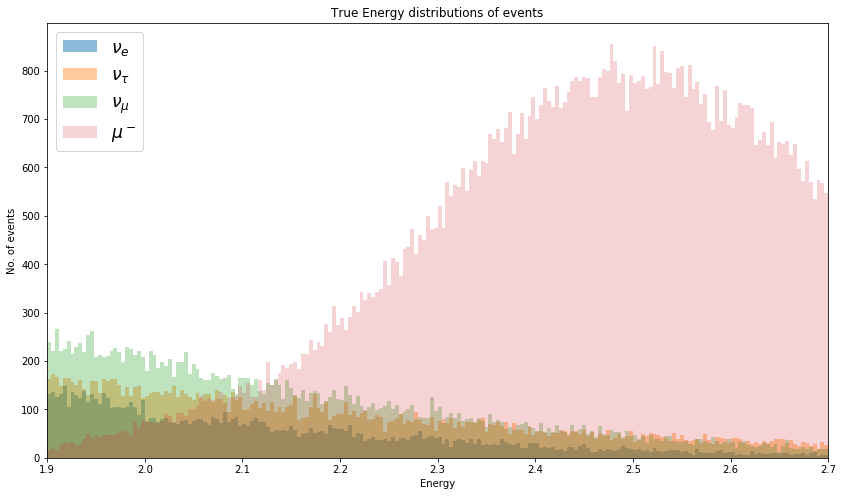

In [38]:
fig, ax = plt.subplots(figsize=(14,8))
bins = 1000
rnge = (0,4)
_ = ax.hist(e,bins=bins,alpha=0.5,label=r'$\nu_e$',range=rnge)
_ = ax.hist(t,bins=bins,alpha=0.4,label=r'$\nu_{\tau}$',range=rnge)
m = ax.hist(m,bins=bins,alpha=0.3,label=r'$\nu_{\mu}$',range=rnge)
muon = ax.hist(muon,bins=bins,alpha=0.2,label=r'$\mu^-$',range=rnge)
ax.legend(fontsize='xx-large')
ax.set(title='True Energy distributions of events',xlabel='Energy',ylabel='No. of events',xlim=(1.9,2.7))

In [39]:
bincm = 0.5*(m[1][1:] + m[1][:-1])
bincmuon = 0.5*(muon[1][1:] + muon[1][:-1])

In [40]:
m1= m[0][(bincm> 1.9)*(bincm < 2.7)]
muon1 = muon[0][(bincmuon> 1.9)*(bincmuon < 2.7)]

In [52]:
maxes = np.argmin(np.array([m1,muon1]),axis=0)
maxvals = []
for i in range(len(maxes)):
    maxvals.append([m1,muon1][maxes[i]][i])

In [74]:
maxvals = np.asarray(maxvals,dtype=int)
ms = dataset[200000:]
menergies = energies[200000:]
muons = dataset_background
muonenergies = dataset_background.data.y[::8]
cutoffs = _[1]



In [130]:
start_binc_ind = np.arange(1000)[bincm>1.9][0]

datalist = []

for i in range(len(maxvals)):
    mask = (menergies>=cutoffs[start_binc_ind+i])*(menergies<cutoffs[start_binc_ind+i+1])
    # size = mask.sum().item()
    valid_ind = np.arange(100000)[mask]
    # print(len(valid_ind),maxvals[i])
    for event in ms[np.random.choice(valid_ind,maxvals[i],replace=False).tolist()]:
        datalist.append(event)

In [131]:
for i in range(len(maxvals)):
    mask = (muonenergies>=cutoffs[start_binc_ind+i])*(muonenergies<cutoffs[start_binc_ind+i+1])
    # size = mask.sum().item()
    valid_ind = np.arange(128730)[mask]
    print(len(valid_ind),maxvals[i])
    for event in muons[np.random.choice(valid_ind,maxvals[i],replace=False).tolist()]:
        datalist.append(event)

16 16
21 21
17 17
27 27
32 32
28 28
32 32
27 27
26 26
39 39
50 50
41 41
45 45
43 43
47 47
47 47
47 47
48 48
55 55
55 55
54 54
48 48
74 74
62 62
77 77
76 76
74 74
71 71
72 72
76 76
90 90
87 87
75 75
92 92
93 93
87 87
100 100
100 100
108 108
128 128
118 118
124 124
120 120
121 121
136 136
114 114
123 123
126 126
127 127
149 149
134 134
154 154
125 125
126 126
161 138
141 132
199 155
151 151
161 161
176151
192 121
186 160
193 144
199 129
184 123
215 141
214 118
243 134
223 139
239 134
231 112
277 118
259 125
313 140
275 121
288 120
265 149
292 129
314 111
301 127
343 108
326 98
340 104
332 113
343 98
348 103
406 107
358 117
412 101
404 109
375 91
431 97
436 100
472 110
422 80
461 85
450 83
500 83
473 125
474 97
520 104
475 71
569 84
542 93
564 83
560 92
599 76
551 80
595 82
614 75
582 83
613 77
610 64
669 90
658 75
680 79
652 73
681 60
715 63
628 58
670 67
712 69
658 74
707 65
746 62
700 56
729 71
764 54
737 62
725 53
768 67
723 57
735 53
755 46
779 67
787 53
778 59
786 67
785 50
745 56
7

In [132]:
class MakeDataset(InMemoryDataset):
    def __init__(self, root,data_list,name):
        super(MakeDataset, self).__init__(root)
        self.data, self.slices = self.collate(data_list)
        torch.save((self.data,self.slices),root+'/'+name)

    @property
    def processed_file_names(self):
        return os.listdir('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/train_test_datasets')

    def process(self):
        pass

In [133]:
MakeDataset('C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/train_test_datasets',datalist,'m_muon_overlap')

Processing...
Done!


MakeDataset(28948)

In [135]:
class LoadDataset(InMemoryDataset):
    def __init__(self, name, root = 'C:/Users/jv97/Desktop/github/Neutrino-Machine-Learning/train_test_datasets'):
        super(LoadDataset, self).__init__(root)
        self.data, self.slices = torch.load(root + '/' + name)
    
    @property
    def processed_file_names(self):
        return os.listdir(root)

In [136]:
data = LoadDataset('m_muon_overlap')
data

LoadDataset(28948)

In [141]:
energies = data.data.y[::8]

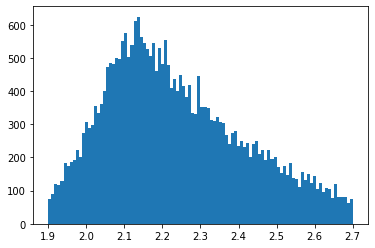

In [143]:
fig,ax = plt.subplots()
_ = ax.hist(energies,bins=100)


14474

In [24]:
# fig.savefig('Energy_distributions.png')

In [25]:
e = pd.Series(dataset[:100000].slices['x']).diff().dropna()
t = pd.Series(dataset[100000:200000].slices['x']).diff().dropna()
m = pd.Series(dataset[200000:].slices['x']).diff().dropna()
muon = pd.Series(dataset_background.slices['x']).diff().dropna()

[(0, 500)]

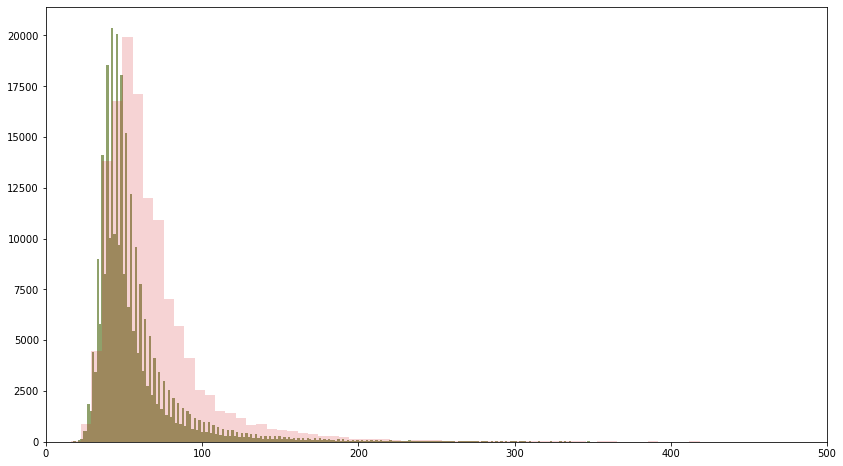

In [28]:
fig, ax = plt.subplots(figsize=(14,8))
bins = 500
_ = ax.hist(e,bins=bins,alpha=0.5)
_ = ax.hist(t,bins=bins,alpha=0.4)
_ = ax.hist(m,bins=bins,alpha=0.3)
_ = ax.hist(muon,bins=bins,alpha=0.2)
ax.set(xlim=(0,500))